<a href="https://colab.research.google.com/github/MarkNCI/AI-Ml-Diploma/blob/main/MHayden_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Description
I am using the Personal Key Indicators of Heart Disease dataset from [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), which is an annual telephone survey conducted by the United States Center for Disease Control in 2020 with over 400,000 participants.

## Column Descriptions


***HeartDisease***: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

***BMI***: Body Mass Index (BMI).

***Smoking***: Have you smoked at least 100 cigarettes in your entire life?

***AlcoholDrinking***: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

***Stroke***: (Ever told) (you had) a stroke?

***PhysicalHealth***: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

***MentalHealth***: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

***DiffWalking***: Do you have serious difficulty walking or climbing stairs?

***Sex***: Are you male or female?

***AgeCategory***: Fourteen-level age category. (then calculated the mean)

***Race***: Imputed race/ethnicity value.

***Diabetic***: (Ever told) (you had) diabetes?

***PhysicalActivity***: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

***GenHealth***: Would you say that in general your health is...

***SleepTime***: On average, how many hours of sleep do you get in a 24-hour period?

***Asthma***: (Ever told) (you had) asthma?

***KidneyDisease***: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

***SkinCancer***: (Ever told) (you had) skin cancer?

In [18]:
# Load Libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

## Upload Cancer Patients dataset (Google Colab) ##
uploaded = files.upload()

In [55]:
# Load dataset
df = pd.read_csv('/content/heart_2020_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Dataset Details

In [20]:
# Dataset details
print(df.columns,'\n')
df.head()

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object') 



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [21]:
# Count of Label Values
print(df['HeartDisease'].value_counts()['No'])
print(df['HeartDisease'].value_counts()['Yes'])

292422
27373


In [22]:
# Count nulls
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [23]:
# Categorical columns
categorical = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
               'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for cat in categorical:
  print(cat)
  print(np.unique(df[cat].values))

HeartDisease
['No' 'Yes']
Smoking
['No' 'Yes']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
Race
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
Diabetic
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
PhysicalActivity
['No' 'Yes']
GenHealth
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
Asthma
['No' 'Yes']
KidneyDisease
['No' 'Yes']
SkinCancer
['No' 'Yes']


# Stats per Categorical columns

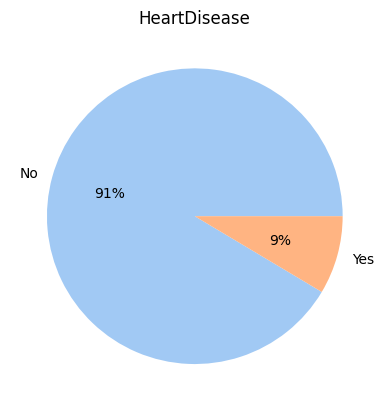

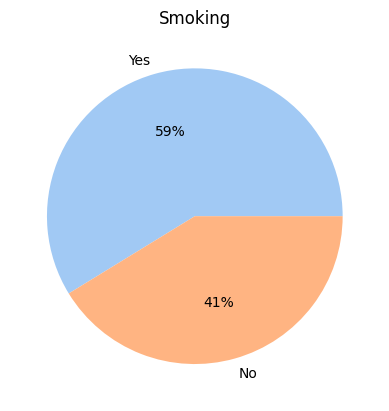

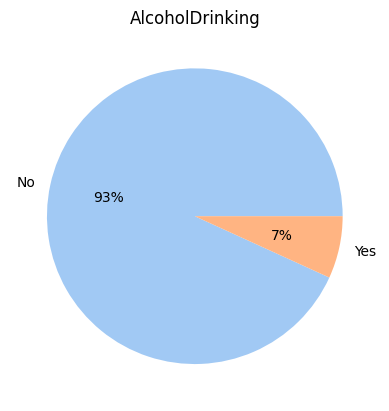

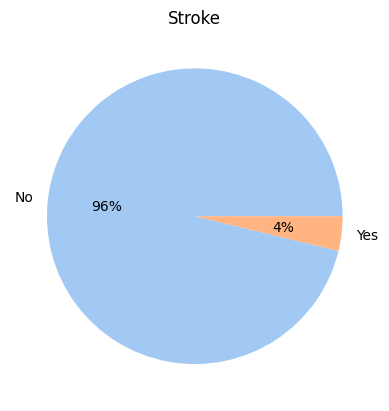

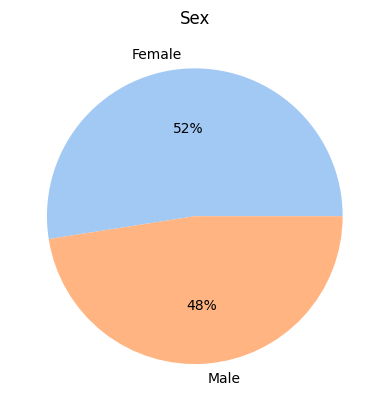

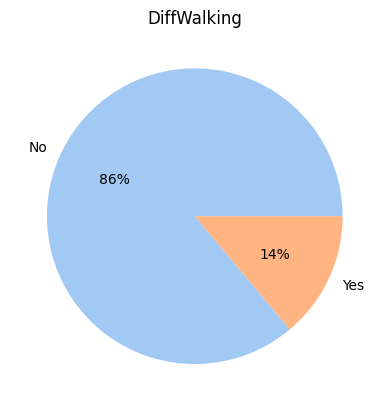

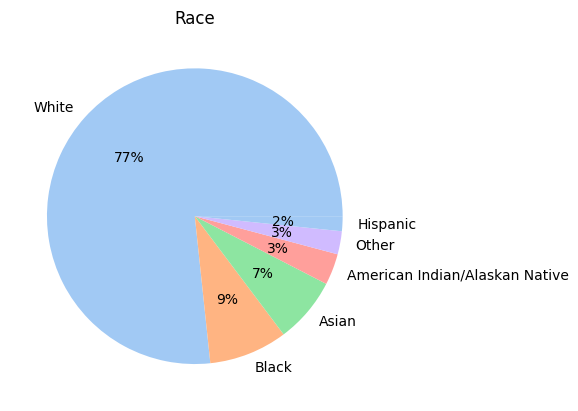

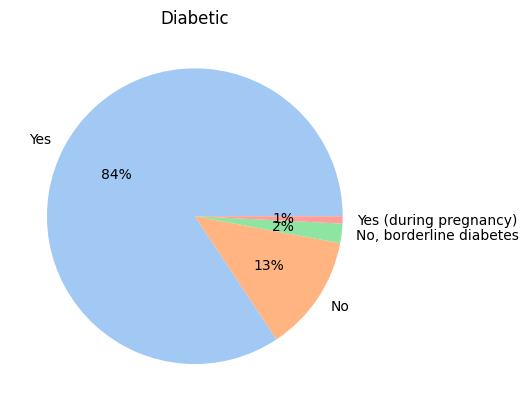

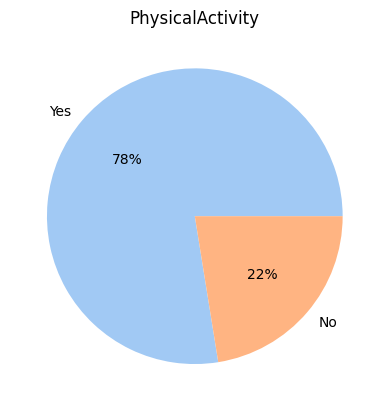

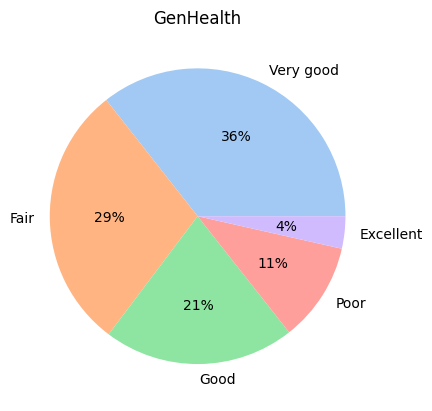

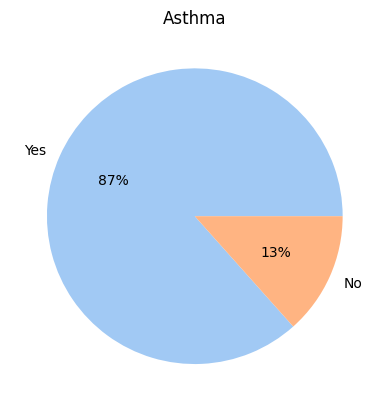

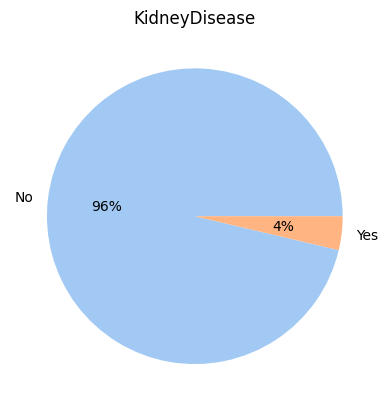

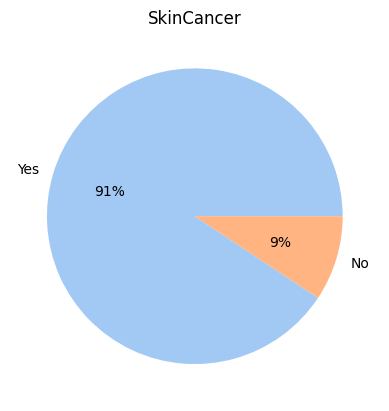

In [24]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['HeartDisease'].value_counts(),labels = df['HeartDisease'].unique(), colors = colors, autopct='%.0f%%')
plt.title('HeartDisease')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Smoking'].value_counts(),labels = df['Smoking'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Smoking')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['AlcoholDrinking'].value_counts(),labels = df['AlcoholDrinking'].unique(), colors = colors, autopct='%.0f%%')
plt.title('AlcoholDrinking')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Stroke'].value_counts(),labels = df['Stroke'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Stroke')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Sex'].value_counts(),labels = df['Sex'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Sex')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['DiffWalking'].value_counts(),labels = df['DiffWalking'].unique(), colors = colors, autopct='%.0f%%')
plt.title('DiffWalking')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Race'].value_counts(),labels = df['Race'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Race')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Diabetic'].value_counts(),labels = df['Diabetic'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Diabetic')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['PhysicalActivity'].value_counts(),labels = df['PhysicalActivity'].unique(), colors = colors, autopct='%.0f%%')
plt.title('PhysicalActivity')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['GenHealth'].value_counts(),labels = df['GenHealth'].unique(), colors = colors, autopct='%.0f%%')
plt.title('GenHealth')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Asthma'].value_counts(),labels = df['Asthma'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Asthma')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['KidneyDisease'].value_counts(),labels = df['KidneyDisease'].unique(), colors = colors, autopct='%.0f%%')
plt.title('KidneyDisease')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['SkinCancer'].value_counts(),labels = df['SkinCancer'].unique(), colors = colors, autopct='%.0f%%')
plt.title('SkinCancer')
plt.show()

# Stats per Numerical columns

<Axes: xlabel='BMI', ylabel='Count'>

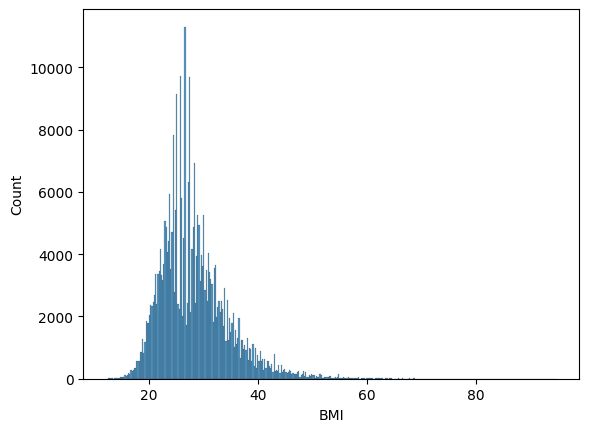

In [66]:
BMI = sns.histplot(data=df['BMI'])
BMI

<Axes: xlabel='PhysicalHealth', ylabel='Count'>

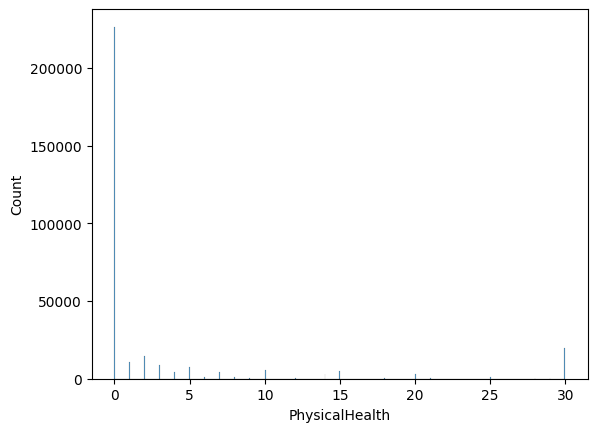

In [72]:
PH = sns.histplot(data=df['PhysicalHealth'])
PH

<Axes: xlabel='MentalHealth', ylabel='Count'>

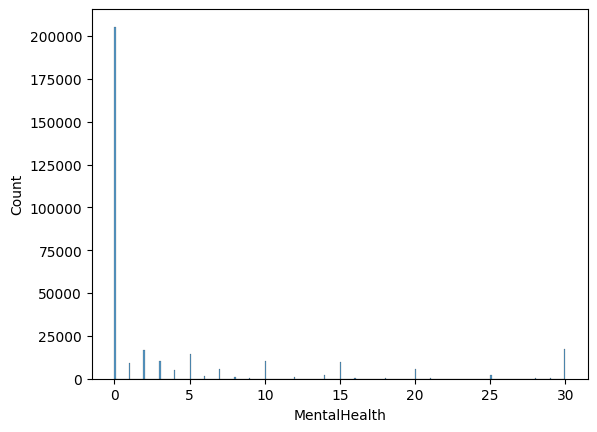

In [77]:
MH = sns.histplot(data=df['MentalHealth'])
MH

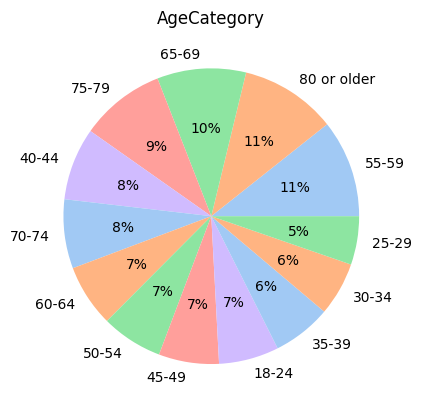

In [78]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['AgeCategory'].value_counts(),labels = df['AgeCategory'].unique(), colors = colors, autopct='%.0f%%')
plt.title('AgeCategory')
plt.show()

<Axes: xlabel='SleepTime', ylabel='Count'>

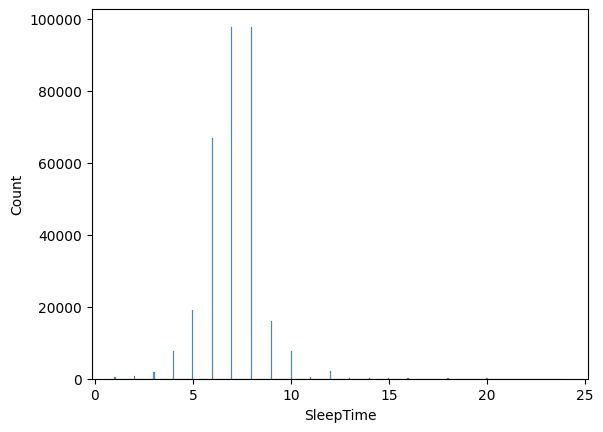

In [75]:
ST = sns.histplot(data=df['SleepTime'])
ST

# Feature Extraction

In [25]:
# Converting ages into mean
print(df['AgeCategory'].unique())
df['Age'] = df['AgeCategory'].apply(lambda x: '57' if x == '55-59' else '80' if x == '80 or older' 
                                    else '67' if x == '65-69' else '77' if x == '75-79' else '42' if x == '40-44'
                                    else '72' if x == '70-74' else '62' if x == '60-64' else '52' if x == '50-54' 
                                    else '47' if x == '45-49' else '20' if x == '18-24' else '37' if x == '35-39' 
                                    else '32' if x == '30-34' else '27' if x == '25-29' else x)
print(df['Age'].unique())
df = df.drop(columns=['AgeCategory'])
df.columns

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['57' '80' '67' '77' '42' '72' '62' '52' '47' '20' '37' '32' '27']


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Age'],
      dtype='object')

In [26]:
# Numerical columns: Normalise between 0 and 1
numerical = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for num in numerical:
  df[num] = df[num]/df[num].max()

df[numerical]

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.175013,0.100000,1.0,0.208333
1,0.214444,0.000000,0.0,0.291667
2,0.280232,0.666667,1.0,0.333333
3,0.255245,0.000000,0.0,0.250000
4,0.249974,0.933333,0.0,0.333333
...,...,...,...,...
319790,0.288983,0.233333,0.0,0.250000
319791,0.314602,0.000000,0.0,0.208333
319792,0.255561,0.000000,0.0,0.250000
319793,0.345915,0.000000,0.0,0.500000


In [27]:
# Count unique values in categorical columns
print(df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']].nunique()>2)

HeartDisease        False
Smoking             False
AlcoholDrinking     False
Stroke              False
DiffWalking         False
Sex                 False
Race                 True
Diabetic             True
PhysicalActivity    False
GenHealth            True
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool


In [28]:
# For columns with 2 unique values, sklearn labelencoder
encoder = preprocessing.LabelEncoder()
for col in df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]:
  df[col] = encoder.fit_transform(df[col])

# One Hot Encoding for columns with more than 2 unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth'], prefix= ['Race', 'Diabetic', 'GenHealth'])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [29]:
# Count of Label Values
print(df['HeartDisease'].value_counts()[0])
print(df['HeartDisease'].value_counts()[1])

292422
27373


In [30]:
# Checking to see if dataset is balanced
train_df = df[:int(len(df)*0.8)]
test_df = df[int(len(df)*0.8):]
print(train_df['HeartDisease'].value_counts())
print(test_df['HeartDisease'].value_counts())

0    233851
1     21985
Name: HeartDisease, dtype: int64
0    58571
1     5388
Name: HeartDisease, dtype: int64


In [31]:
# As dataset is imbalanced, will oversample to balance out
no_heartdisease = train_df[train_df['HeartDisease'] == 0]
has_heartdisease = train_df[train_df['HeartDisease'] == 1]

has_heartdisease = has_heartdisease.sample(len(no_heartdisease),replace=True)
train_df = pd.concat([no_heartdisease, has_heartdisease], axis=0)
print(train_df['HeartDisease'].value_counts())

# As dataset is imbalanced, will oversample to balance out
no_heartdisease = test_df[test_df['HeartDisease'] == 0]
has_heartdisease = test_df[test_df['HeartDisease'] == 1]

has_heartdisease = has_heartdisease.sample(len(no_heartdisease),replace=True)
test_df = pd.concat([no_heartdisease, has_heartdisease], axis=0)
print(test_df['HeartDisease'].value_counts())

0    233851
1    233851
Name: HeartDisease, dtype: int64
0    58571
1    58571
Name: HeartDisease, dtype: int64


In [32]:
# Concat into single dataframe
df = pd.concat([train_df,test_df],axis=0)
df['HeartDisease'].value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [33]:
# Encode as Numpy arrays for Train/Test split
X = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Age',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good']]
y = df['HeartDisease']
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [34]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Models

In [35]:
# Decision Tree
%%time
dt = DecisionTreeClassifier().fit(X_train, y_train)
score = dt.score(X_test, y_test)
predict = dt.predict(X_test)
print(str(score))
print("Total points: %d Correctly labeled points : %d" %(y_test.shape[0],(y_test == predict).sum()))
cm = np.array(confusion_matrix(y_test, predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['has_heartdisease', 'no_heartdisease'],
columns=['predicted_heartdisease','predicted_healthy'])
print(confusion)
print(classification_report(y_test, predict))

0.9546632013610444
Total points: 116969 Correctly labeled points : 111666
                  predicted_heartdisease  predicted_healthy
has_heartdisease                   58575                 57
no_heartdisease                     5246              53091
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     58337
         1.0       0.92      1.00      0.96     58632

    accuracy                           0.95    116969
   macro avg       0.96      0.95      0.95    116969
weighted avg       0.96      0.95      0.95    116969

CPU times: user 5.07 s, sys: 6.59 ms, total: 5.07 s
Wall time: 5.07 s


In [36]:
# Random Forest
%%time
rf = RandomForestClassifier().fit(X_train, y_train)
score = rf.score(X_test, y_test)
predict = rf.predict(X_test)
print(str(score))
print("Total points: %d Correctly labeled points : %d" %(y_test.shape[0],(y_test == predict).sum()))
cm = np.array(confusion_matrix(y_test, predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['has_heartdisease', 'no_heartdisease'],
columns=['predicted_heartdisease','predicted_healthy'])
print(confusion)
print(classification_report(y_test, predict))

0.9685215740922809
Total points: 116969 Correctly labeled points : 113287
                  predicted_heartdisease  predicted_healthy
has_heartdisease                   58579                 53
no_heartdisease                     3629              54708
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     58337
         1.0       0.94      1.00      0.97     58632

    accuracy                           0.97    116969
   macro avg       0.97      0.97      0.97    116969
weighted avg       0.97      0.97      0.97    116969

CPU times: user 1min 26s, sys: 567 ms, total: 1min 26s
Wall time: 1min 26s


In [37]:
# K-Nearset Neighbours
%%time
knn = KNeighborsClassifier().fit(X_train, y_train)
score = knn.score(X_test, y_test)
predict = knn.predict(X_test)
print(str(score))
print("Total points: %d Correctly labeled points : %d" %(y_test.shape[0],(y_test == predict).sum()))
cm = np.array(confusion_matrix(y_test, predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['has_heartdisease', 'no_heartdisease'],
columns=['predicted_heartdisease','predicted_healthy'])
print(confusion)
print(classification_report(y_test, predict))

0.8987680496541819
Total points: 116969 Correctly labeled points : 105128
                  predicted_heartdisease  predicted_healthy
has_heartdisease                   58308                324
no_heartdisease                    11517              46820
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89     58337
         1.0       0.84      0.99      0.91     58632

    accuracy                           0.90    116969
   macro avg       0.91      0.90      0.90    116969
weighted avg       0.91      0.90      0.90    116969

CPU times: user 18min 58s, sys: 1.37 s, total: 18min 59s
Wall time: 11min 20s


In [39]:
# Naive Bayes
%%time
nb = GaussianNB().fit(X_train, y_train)
score = nb.score(X_test, y_test)
print(str(score))
predict = nb.predict(X_test)
print("Total points: %d Correctly labeled points : %d" %(y_test.shape[0],(y_test == predict).sum()))
cm = np.array(confusion_matrix(y_test, predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['has_heartdisease', 'no_heartdisease'],
columns=['predicted_heartdisease','predicted_healthy'])
print(confusion)
print(classification_report(y_test, predict))

0.7177799245954056
Total points: 116969 Correctly labeled points : 83958
                  predicted_heartdisease  predicted_healthy
has_heartdisease                   38848              19784
no_heartdisease                    13227              45110
              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73     58337
         1.0       0.75      0.66      0.70     58632

    accuracy                           0.72    116969
   macro avg       0.72      0.72      0.72    116969
weighted avg       0.72      0.72      0.72    116969

CPU times: user 1.71 s, sys: 34.9 ms, total: 1.75 s
Wall time: 1.78 s


In [42]:
# Multi-Level Perceptron
%%time
mlp = MLPClassifier(random_state=1, max_iter=300,alpha=1).fit(X_train, y_train)
score = mlp.score(X_test, y_test)
print(str(score))
predict = mlp.predict(X_test)
print("Total points: %d Correctly labeled points : %d" %(y_test.shape[0],(y_test == predict).sum()))
cm = np.array(confusion_matrix(y_test, predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['has_heartdisease', 'no_heartdisease'],
columns=['predicted_heartdisease','predicted_healthy'])
print(confusion)
print(classification_report(y_test, predict))

0.7624242320614864
Total points: 116969 Correctly labeled points : 89180
                  predicted_heartdisease  predicted_healthy
has_heartdisease                   46793              11839
no_heartdisease                    15950              42387
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75     58337
         1.0       0.75      0.80      0.77     58632

    accuracy                           0.76    116969
   macro avg       0.76      0.76      0.76    116969
weighted avg       0.76      0.76      0.76    116969

CPU times: user 12min 33s, sys: 6min 16s, total: 18min 50s
Wall time: 11min 15s


In [43]:
# Linear Regression
%%time
lr = LinearRegression().fit(X_train, y_train)
score = lr.score(X_test, y_test)
print(str(score))

0.33157929464082436
CPU times: user 622 ms, sys: 118 ms, total: 740 ms
Wall time: 561 ms


In [44]:
# Neural Network
model = Sequential()
model.add(Dense(50, input_dim=29, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
# Run Neural Network
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
14622/14622 [==============================] - 41s 3ms/step - loss: 0.4992 - accuracy: 0.7593
Epoch 2/100
14622/14622 [==============================] - 38s 3ms/step - loss: 0.4912 - accuracy: 0.7649
Epoch 3/100
14622/14622 [==============================] - 35s 2ms/step - loss: 0.4893 - accuracy: 0.7657
Epoch 4/100
14622/14622 [==============================] - 37s 3ms/step - loss: 0.4879 - accuracy: 0.7665
Epoch 5/100
14622/14622 [==============================] - 37s 3ms/step - loss: 0.4871 - accuracy: 0.7669
Epoch 6/100
14622/14622 [==============================] - 35s 2ms/step - loss: 0.4859 - accuracy: 0.7679
Epoch 7/100
14622/14622 [==============================] - 37s 3ms/step - loss: 0.4854 - accuracy: 0.7675
Epoch 8/100
14622/14622 [==============================] - 36s 2ms/step - loss: 0.4846 - accuracy: 0.7683
Epoch 9/100
14622/14622 [==============================] - 36s 2ms/step - loss: 0.4839 - accuracy: 0.7685
Epoch 10/100
14622/14622 [====================

In [46]:
# Print Accuracy
model.summary()
score = model.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy = ',score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1500      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9,201
Trainable params: 9,201
Non-trainable params: 0
_________________________________________________________________
Model Accuracy =  0.7695030570030212
